# 1. INVESTIGACIÓN:  Proceso de guardado y carga de modelos en PyTorch


En Pytorch podemos guardar y cargar los modelos asi:
   - torch.save(model, "trading_model.pt") -> Guarda un objeto de PyTorch en un archivo utilizando pickle. Se utiliza comúnmente para guardar los pesos o el estado de un modelo.

   - model = torch.load("trading_model.pt") -> Carga el objeto guardado de un archivo. Se usa para restaurar el modelo o los parámetros previamente guardados.
  
De esta forma no solo guardamos los datos del propio algoritmo sino también los pesos, arquitectura y demas que necesita la librería pickle para una correcta carga. La función torch.save guarda el modelo completo, incluyendo la estructura y los pesos.

(LocalHorse, s.f.),(García-Ferreira, 2023)

## Las diferencias entre guardar el modelo completo y guardar solo el state_dict.

Como se mencioo anteriormente, al guardar el modelo completo (torch.save(model, 'modelo.pth')) se guarda la arquitectura del modelo con los pesos entrenados.

Si se guarda solo el state_dict (torch.save(model.state_dict(), 'modelo.pth'))se guarda solo los parámetros entrenados (pesos y bias) ya que no se guarda la arquitectura del modelo, se deberia definir de nuevo antes de cargar los pesos ya que permite capturar un diccionario con todos los parámetros entrenados del modelo. Esto es crucial porque te permite transferir los pesos ya entrenados y mejorados a otro modelo cuando lo necesites.

(Platzi, s.f.), (Sensio, 2022)

## Cómo se debe cargar un modelo previamente entrenado para hacer inferencia.

Cuando se guarda un modelo para inferencia solo es necesario guardar los parámetros aprendidos por el modelo entrenado. Guardar el state_dict del modelo con la función torch.save() te dará la mayor flexibilidad para restaurar el modelo más adelante, por lo que es el método recomendado para guardar modelos.

Una convención común en PyTorch es guardar los modelos usando las extensiones .pt o .pth.

Para cargar el modelol se debe definir la arquitetcura al usar state.dict():

(PyTorch, s.f.)

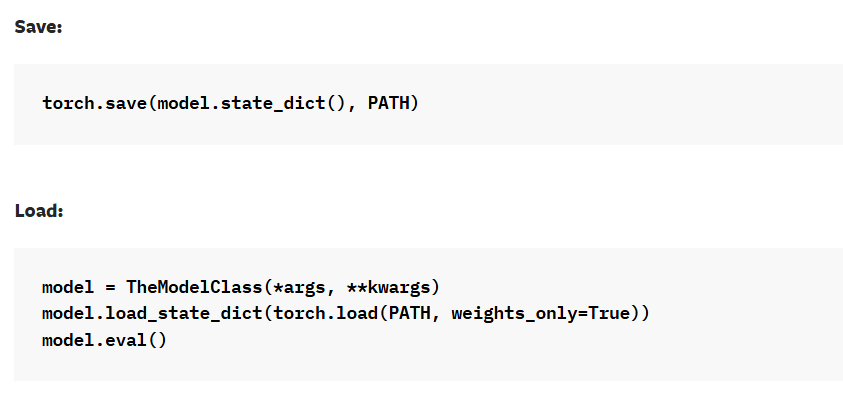

## Qué se debe tener en cuenta antes de realizar inferencia (model.eval(), desactivar gradientes, etc.).

- Se debe llamar a model.eval() para configurar las capas de dropout y normalización por lotes (batch normalization) en modo evaluación antes de realizar inferencias. Se debe poner en modo inferencia ( eval() ), el no hacerlo puede dar resultados de inferencia inconsistentes. (PyTorch, s.f.)

- Si el modelo es para realizar predicciones, al realizar inferencia, es crucial mapear las predicciones del modelo con etiquetas comprensibles mediante un diccionario que traduce los números que produce el modelo en palabras claras. Para nuestro caso:

Se u un diccionario llamado DBpedia Label que hace el mapeo de números a palabras como "company", "artist", "athlete", entre otros.
Estas etiquetas se pueden obtener tanto de la página oficial del dataset como de otros recursos similares que trabajen con estos datasets.

#Referencias
LocalHorse. (s.f.). *Cómo guardar y cargar modelos en PyTorch con save y load*. Recuperado de https://localhorse.net/article/como-guardar-y-cargar-modelos-en-pytorch-con-save-y-load

García-Ferreira, J. (2023). *Guardar un modelo para entorno real*. Recuperado de https://www.garcia-ferreira.es/guardar-un-modelo-para-entorno-real/#Pytorch

Platzi. (s.f.). *Almacenamiento del modelo con torch.save y state_dict*. Recuperado de https://platzi.com/clases/7693-pytorch/62637-almacenamiento-del-modelo-con-torchsave-y-state_di/

Sensio, J. (2022). *Guardar y cargar modelos en PyTorch*. Recuperado de https://www.juansensio.com/blog/054_pytorch_save

PyTorch. (s.f.). *Saving and loading models*. Recuperado de https://pytorch.org/tutorials/beginner/saving_loading_models.html#what-is-a-state-dict


# 2. Implementación práctica
el dataset se descargo de kaggle: https://www.kaggle.com/datasets/imsparsh/flowers-dataset?resource=download

## 2.1. Selección del dataset:


In [9]:
!unzip -q archive.zip

In [2]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 67.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [3]:
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import fetch_openml
import numpy as np
from torch.utils.data import DataLoader
from PIL import Image
import os
from torchvision import transforms

In [4]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, ix):
        img = Image.open(self.image_paths[ix]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(self.labels[ix]).long()

## 2.2. Preprocesamiento:

In [5]:
class FlowerDataModule(pl.LightningDataModule):
    def __init__(self, data_dir='train', batch_size=64):
        super().__init__()
        self.data_dir = data_dir  # se le anadio
        self.batch_size = batch_size
        self.transform = transforms.Compose([ # Escalado a tamaño uniforme
            transforms.Resize((128, 128)), # Conversión a tensor y escala [0, 255] → [0.0, 1.0]
            transforms.ToTensor()
        ])

    def setup(self, stage=None):
        classes = sorted(os.listdir(self.data_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        image_paths, labels = [], []

        for cls_name in classes:
            folder = os.path.join(self.data_dir, cls_name)
            for img_name in os.listdir(folder):
                image_paths.append(os.path.join(folder, img_name))
                labels.append(self.class_to_idx[cls_name])

        total = len(image_paths)
        X_train, X_val = image_paths[:int(0.8*total)], image_paths[int(0.8*total):]
        y_train, y_val = labels[:int(0.8*total)], labels[int(0.8*total):]

        self.train_ds = Dataset(X_train, y_train, transform=self.transform)
        self.val_ds = Dataset(X_val, y_val, transform=self.transform)


    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size)

In [10]:
dm = FlowerDataModule(data_dir='train')  # Inicializa y configura el DataModule
dm.setup()
idx_to_class = {v: k for k, v in dm.class_to_idx.items()} # mapeo inverso: índice para obetener el nombre de clase
imgs, labels = next(iter(dm.train_dataloader())) #Toma un batch de imágenes

En el DataModule personalizado para el dataset de flores:
- 64 es el tamaño del batch que definimos
- 3 es por las imágenes son RGB, 3 canales.
- 128 x 128 es el tamaño al que las estamos redimensionando con transforms Resize((128, 128)).

- Los labels son una lista de 64 enteros, cada uno representando una clase (daisy, rose, tulip, etc.).

El pipeline de datos está listo para entrenamiento

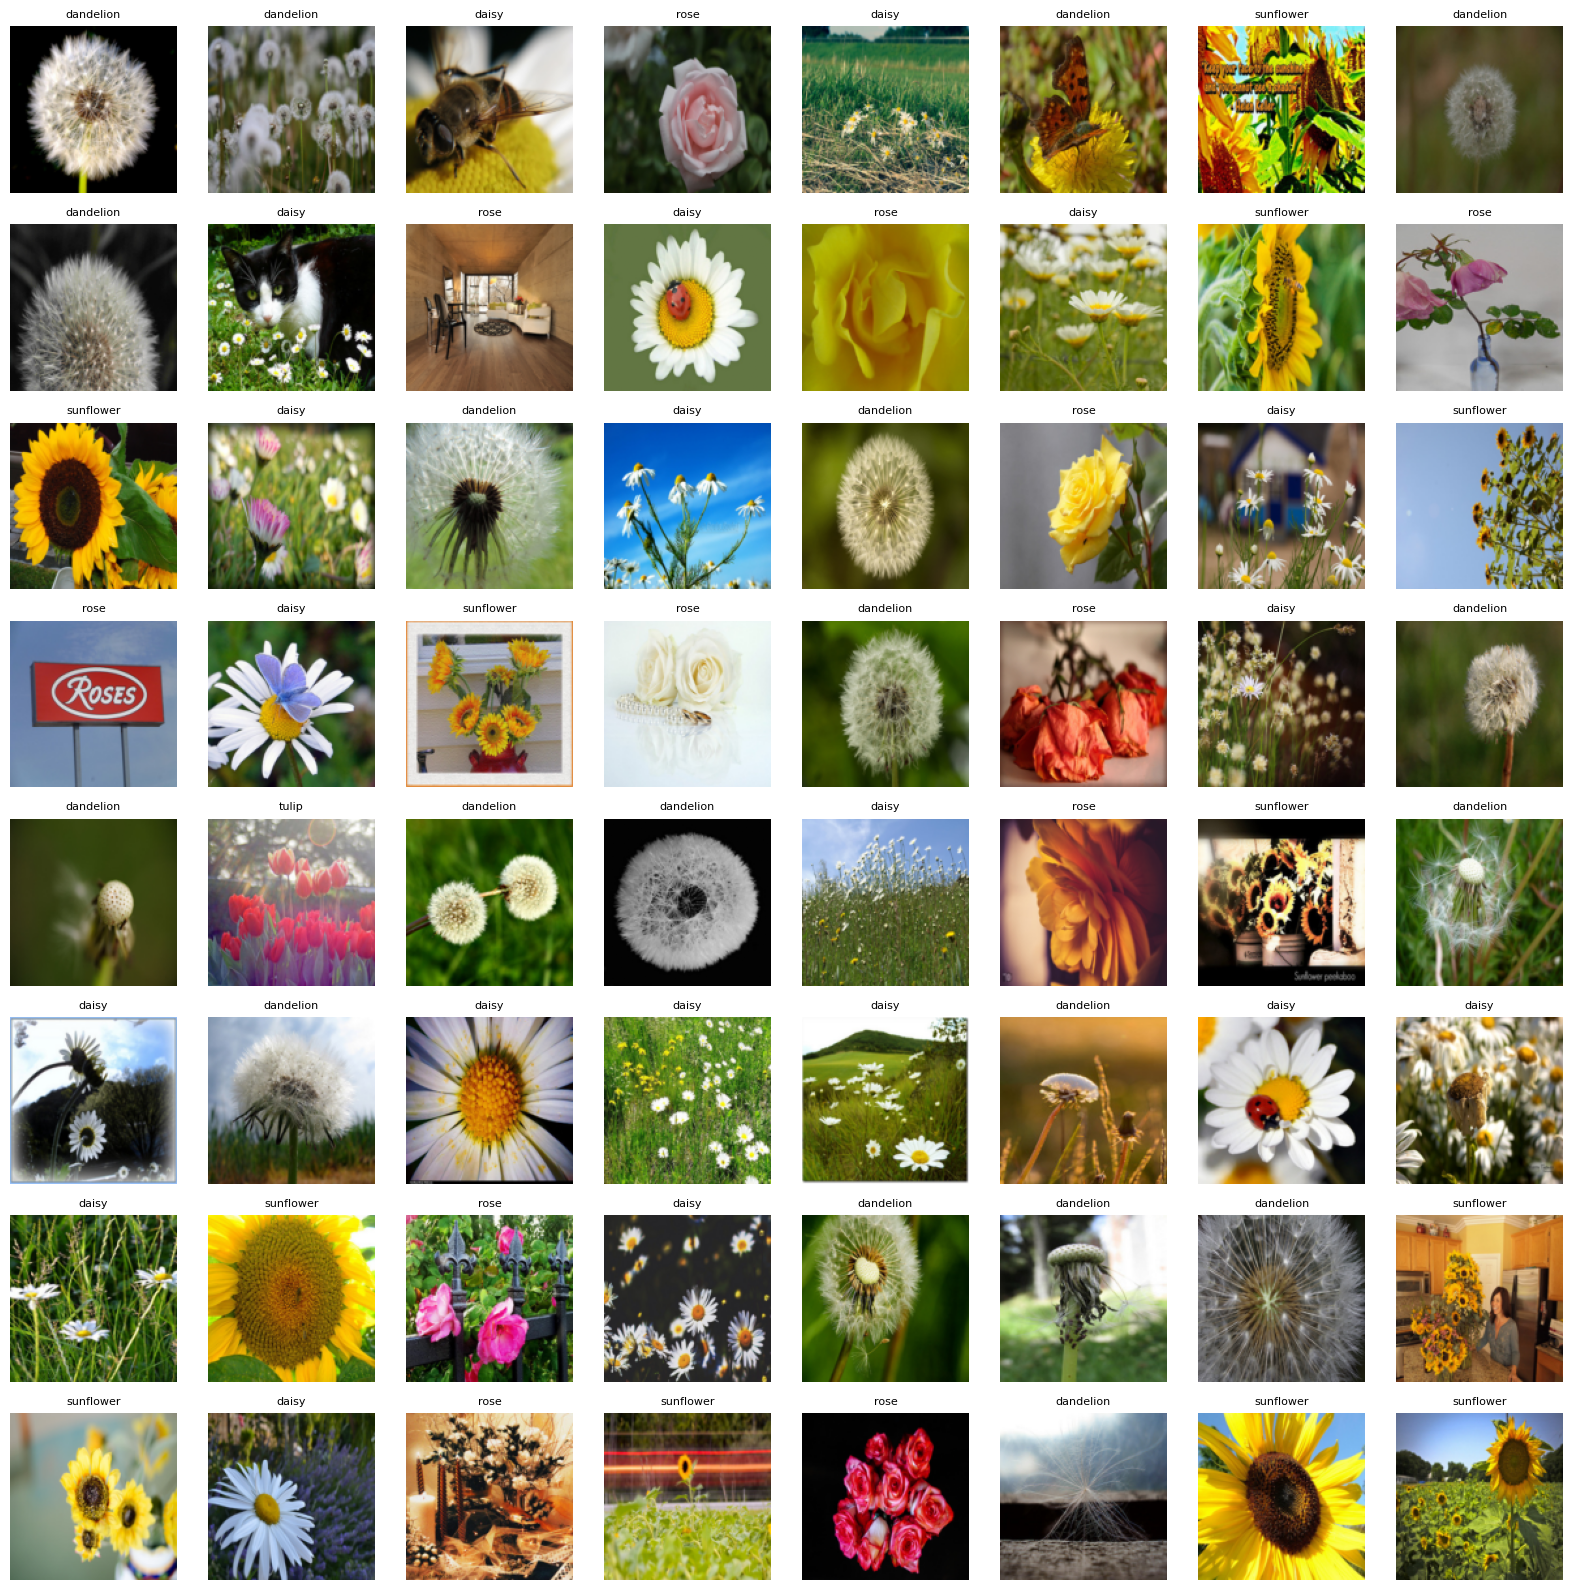

In [11]:
r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r * c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.permute(1, 2, 0))  # de [C, H, W] a [H, W, C]
        ax.set_title(idx_to_class[label.item()], fontsize=8)
plt.tight_layout()
plt.show()

## 2.3.  Modelo

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self, in_chans=3, n_classes=5):  # 5 clases: daisy, dandelion, rose, sunflower, tulip
        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_chans, 32, kernel_size=3, padding=1),  # 1ra capa convolucional
            nn.ReLU(),
            nn.MaxPool2d(2),  # ↓ tamaño a la mitad

            nn.Conv2d(32, 64, kernel_size=3, padding=1),        # 2da capa convolucional
            nn.ReLU(),
            nn.MaxPool2d(2),  # ↓ tamaño a la mitad

            nn.Flatten(),  # prepara para capa densa
            nn.Linear(64 * 32 * 32, 128),  # si tus imágenes son 128x128
            nn.ReLU(),
            nn.Linear(128, n_classes)  # salida final con 5 clases
        )

    def forward(self, x):
        return self.net(x)


## 2.4. Entrenamiento:

In [14]:
def train(model, datamodule, epochs=5, lr=1e-3, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model = model.to(device)
    datamodule.setup()

    train_loader = datamodule.train_dataloader()
    val_loader = datamodule.val_dataloader()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        avg_loss = train_loss / total

        # Validación
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


In [15]:
model = SimpleCNN(in_chans=3, n_classes=5)
dm = FlowerDataModule(batch_size=64)
train(model, dm, epochs=5)

Epoch 1/5 - Train Loss: 1.5549, Train Acc: 0.3743, Val Acc: 0.0000
Epoch 2/5 - Train Loss: 1.0599, Train Acc: 0.5724, Val Acc: 0.0000
Epoch 3/5 - Train Loss: 0.9652, Train Acc: 0.6330, Val Acc: 0.0000
Epoch 4/5 - Train Loss: 0.8916, Train Acc: 0.6617, Val Acc: 0.0036
Epoch 5/5 - Train Loss: 0.8101, Train Acc: 0.6985, Val Acc: 0.0273


## 2.5. Guardado y carga del modelo COMO DICCIONARIO:

In [16]:
#guardar el modelo
def save_model(model, path='model_cnn.pth'):
    torch.save(model.state_dict(), path)
    print(f"Modelo guardado en {path}")

save_model(model)

Modelo guardado en model_cnn.pth


In [17]:
#Cargar el modelo
def load_model(model_class, path='model_cnn.pth', device='cuda' if torch.cuda.is_available() else 'cpu'):
    model = model_class().to(device)
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    print(f"Modelo cargado desde {path}")
    return model

In [ ]:
#model = load_model(lambda: SimpleCNN(in_chans=3, n_classes=5))  # Usa lambda para pasar la clase con sus args

## 2.6 Inferencia:

In [18]:
class TestDataset(Dataset):
    def __init__(self, image_dir, csv_file, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.df = pd.read_csv(csv_file)
        self.image_filenames = self.df['filename'].tolist()

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, self.image_filenames[idx]

Ya que nuestro conjunto test viene en una carpeta separada llamada test/, y contiene 924 imágenes sin etiquetas, y hay un CSV (Testing_set_flower.csv) que define el orden de predicción.

Entonces, para este conjunto test, necesitamos otra clase distinta porque no hay subcarpetas por clase (como en train), solo imágenes sueltas. No tienes etiquetas en el código (solo los nombres de los archivos) y por eso definimos una segunda clase TestDataset que solo devuelve las imágenes + nombres de archivo para predecir, no etiquetas reales.

In [25]:
def mostrar_predicciones_solo_pred(model, test_dataset, idx_to_class, n=5, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.eval()
    model.to(device)

    indices = torch.randint(0, len(test_dataset), (n,))
    fig = plt.figure(figsize=(n * 3, 4))

    for i, idx in enumerate(indices):
        img_tensor, filename = test_dataset[idx]
        input_tensor = img_tensor.unsqueeze(0).to(device)
        output = model(input_tensor)
        pred_idx = output.argmax(dim=1).item()
        pred_label = idx_to_class[pred_idx]

        ax = plt.subplot(1, n, i + 1)
        ax.axis("off")
        ax.imshow(img_tensor.permute(1, 2, 0).cpu())
        ax.set_title(f"Predicción: {pred_label}\nArchivo: {filename}", fontsize=9)

    plt.tight_layout()
    plt.show()

Modelo cargado desde model_cnn.pth


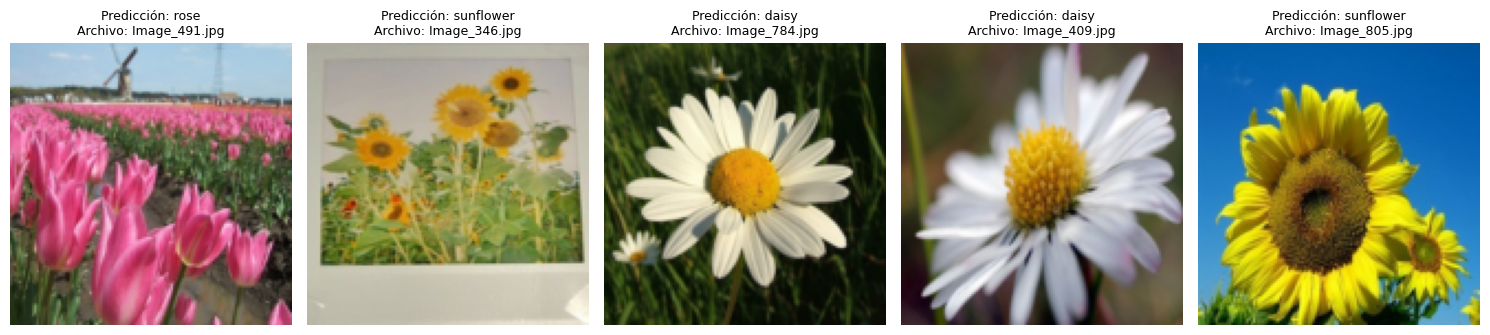

In [26]:
# ataset de test con transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),])

test_ds = TestDataset(image_dir='test', csv_file='Testing_set_flower.csv', transform=transform)
idx_to_class = {v: k for k, v in dm.class_to_idx.items()}# Diccionario idx_to_class
model = load_model(lambda: SimpleCNN(in_chans=3, n_classes=5))# Cargar el modelo entrenado
mostrar_predicciones_solo_pred(model, test_ds, idx_to_class, n=5) # Mostrar predicciones

Aunque no se cuentan labels para esta parte, se puede distinguir correctamente si esta funcionando las predicciones